In [1]:
steps = ['1. Prepare data',
         '2. Choose correct algorithm',
         '3. Use algorithm to create model to fit training data',
         '4. Evaluate model',
         '5. Improve model',
         '6. Save and load trained model']

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
heart_disease = pd.read_csv("heart_disease.csv")

# 1. Prepare Data
1. Split data in features and labels (x and y)
2. Filling (imputing) or disregard missing/irrelevant values
3. Converting non-numerical data to numerical (feature encoding)

In [4]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# features include everything but target
X = heart_disease.drop("target", axis=1)

# label is target
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# 80% in train, 20% in test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1: Make sure data is numerical

In [8]:
# Example: predict car price based on features
car_sales = pd.read_csv("car_sales_extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [9]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [10]:
# Split into X y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [11]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Build model (WON'T WORK SINCE CATEGORICAL DATA NOT CONVERTED TO NUMERICAL)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
# Convert categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot, 
                                   categories)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
pd.DataFrame(transformed_X).head()

In [ ]:
# Alternative method using dummies
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies.head()

In [ ]:
# Fit model with numerically converted data
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)
model.score(X_test, y_test)

### 1.2: Dealing with missing values
1. Remove them from samples
2. Fill them with some value (imputation)

In [ ]:
missing_data = pd.read_csv("car_sales_extended_missing_data.csv")
missing_data.head()

In [ ]:
missing_data.isna().sum()

In [ ]:
X = missing_data.drop("Price", axis=1)
Y = missing_data["Price"]

In [ ]:
# Convert categories to numbers (WON'T WORK SINCE WE HAVEN'T DEALT WITH MISSING VALUES)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot, 
                                   categories)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

### Option 1: Fill missing data with Pandas

In [ ]:
# For filling doors column, we see most cars have 4 doors
car_sales["Doors"].value_counts()

In [ ]:
# impute for features columns
missing_data["Make"].fillna("missing", inplace=True)
missing_data["Colour"].fillna("missing", inplace=True)
missing_data["Odometer (KM)"].fillna(missing_data["Odometer (KM)"].mean(), inplace=True)
missing_data["Doors"].fillna(4, inplace=True)

In [ ]:
# remove samples with missing labels (only thing with na values at this point is labels col)
missing_data.dropna(inplace=True)
missing_data.isna().sum()

In [ ]:
# Now turn filled categorical data into numerical
X = missing_data.drop("Price", axis=1)
Y = missing_data["Price"]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categories = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot, 
                                   categories)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(missing_data)
transformed_X

### Option 2: Fill missing data using Scikit Learn

In [13]:
# First drop missing label samples
missing_data = pd.read_csv("car_sales_extended_missing_data.csv")
missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [14]:
missing_data.dropna(subset=["Price"], inplace=True)
missing_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [15]:
# split up data into different sets
from sklearn.model_selection import train_test_split
X = missing_data.drop("Price", axis=1)
Y = missing_data["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [16]:
# Fill missing data (impute) using Scikit Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and numerical values with mean
categorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
numerical_imputer = SimpleImputer(strategy="mean")

# Define columns
categorical_cols = ["Make", "Colour"]
door_cols = ["Doors"]
numerical_cols = ["Odometer (KM)"]

# Create imputer to fill all missing columns
imputer = ColumnTransformer([("categorical_imputer", categorical_imputer, categorical_cols),
                             ("door_imputer", door_imputer, door_cols),
                             ("numerical_imputer", numerical_imputer, numerical_cols)])

filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Put data back into Pandas DataFrames (DON"T FORGET THIS STEP)
filled_X_train = pd.DataFrame(filled_X_train, columns=["Make","Colour","Doors","Odometer (KM)"])
filled_X_test = pd.DataFrame(filled_X_test, columns=["Make","Colour","Doors","Odometer (KM)"])

In [17]:
# Convert filled data into numerical with onehotencoder
from sklearn.preprocessing import OneHotEncoder

categories = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                   one_hot, 
                                   categories)],
                                   remainder="passthrough")

transformed_X_train = transformer.fit_transform(filled_X_train)
transformed_X_test = transformer.transform(filled_X_test)

transformed_X_train.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.71373e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.13324e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.31160e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.39750e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 9.08560e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.00219e+05]])

In [18]:
# Now create model using filled numerical data
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(transformed_X_train, Y_train)
model.score(transformed_X_test, Y_test)

0.22864413775216397

In [19]:
steps

['1. Prepare data',
 '2. Choose correct algorithm',
 '3. Use algorithm to create model to fit training data',
 '4. Evaluate model',
 '5. Improve model',
 '6. Save and load trained model']

# 2. Choose Algorithm
- Scikit Learn Map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
- regression
- classification

### 2.1: Regression Problem

In [20]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_housing = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_housing["target"] = pd.Series(boston.target)
boston_housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [21]:
# Get number of samples
len(boston_housing)

506

In [22]:
# Trying Ridge Regression model
from sklearn.linear_model import Ridge
np.random.seed(42)

X = boston_housing.drop("target", axis=1)
Y = boston_housing["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = Ridge()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.6662221670168518

In [23]:
# Now try Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_housing.drop("target", axis=1)
Y = boston_housing["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
rf.score(X_test, Y_test)

# Much better score

0.873969014117403

### 2.2: Classification Problem

In [25]:
heart_disease = pd.read_csv("heart_disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Get number of samples
len(heart_disease)

303

In [27]:
# First try linear SVC
from sklearn.svm import LinearSVC
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = LinearSVC()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

# < 50% indicates try different model

/Users/luketchang/Desktop/sample_project/env/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.47540983606557374

In [28]:
# Compare to Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

# 3. Fit Model To Data

In [29]:
# Classification
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

In [30]:
# Regression
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_housing.drop("target", axis=1)
Y = boston_housing["target"]

X_train_reg, X_test_reg, Y_train_reg, Y_test_reg = train_test_split(X, Y, test_size=0.2)

rf = RandomForestRegressor()
rf.fit(X_train_reg, Y_train_reg)
rf.score(X_test_reg, Y_test_reg)

0.873969014117403

### 3.1: Making Predictions with Model (Classification)

#### 1. `predict()`

In [31]:
# Predictions made on X test data
y_preds = clf.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [32]:
# Actual results in Y test data
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [33]:
# Get score manually by comparing predictions and actual data
np.mean(Y_test == y_preds)

0.8524590163934426

#### 2. `predict_proba()`

In [34]:
# predict_proba returns actual probability estimates for each data point (not rounded up or down)
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

### 3.2: Making Predictions with Model (Regression)

In [35]:
y_reg_preds = rf.predict(X_test_reg)
y_reg_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [36]:
np.array(Y_test[:10])

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [37]:
# Use mean absolute error to compare predictions with actual data
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test_reg, y_reg_preds)

2.1226372549019623

# 4(i) Evaluate Model (Classification)
1. `score` Method
2. Cross Validation
3. Area Under ROC Curve
4. Confusion Matrix
5. Classification Report

**Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

**Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

**Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

**F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

**Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

**Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

**Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

**ROC Curve** - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

**Area Under Curve** (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

### 4.1: model.score
- scores model against given X and Y test data pairings
- classification score returns average accuracy
- regression score returns coefficient of determination (R^2)

### 4.2: Cross Validation
- does n number of random splits to avoid lucky split and returns accuracy (based on default or given scoring method) for each split

In [38]:
# Heart Disease Example
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

In [39]:
from sklearn.model_selection import cross_val_score

# use default scorer (mean accuracy)
cvs = cross_val_score(clf, X, Y, cv=5, scoring=None)

In [40]:
print(f"Cross Validated Accuracy: {np.mean(cvs) * 100:.2f}%")

Cross Validated Accuracy: 81.16%


### 4.3: Area Under Receiver Operating Characteristic (ROC) Curve
- true positive rate (tpr) over false postive rate (fpr)

In [41]:
# Heart Disease Example
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

In [42]:
from sklearn.metrics import roc_curve

y_probs = clf.predict_proba(X_test)
y_probs[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [43]:
# probabilities of positive (1) column
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.11, 0.51, 0.57, 0.16, 0.82])

In [44]:
# Get false positive and true positive rates
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

In [45]:
# Create function to plot ROC curve
import matplotlib.pyplot as plt
from importlib import reload

def plot_roc_curve(fpr, tpr):
    # plot ROC curve
    reload(plt)
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # plot baseline
    plt.plot([0,1], [0,1], color="blue", linestyle="--", label="guessing")
    
    # add labels
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

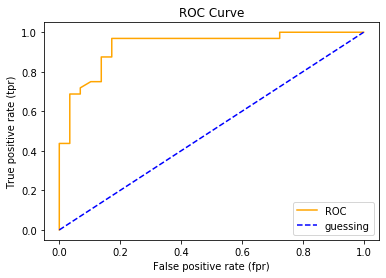

In [46]:
plot_roc_curve(fpr,tpr)

In [47]:
# Calculate area under curve aka score
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_probs_positive)

0.9304956896551724

### 4.4: Confusion Matrix
- shows labels a model predicts vs. the actual labels (showing where model is "confused")
- left to right adds up to totals for actual results (compare to results by predicted up and down)
- m=-1 diagonal shows you correct predictions
- m=1 diagonal shows you false positives and false negatives

In [48]:
# Heart Disease Example
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426

In [49]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(Y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [50]:
# Visualize using Pandas crosstab
pd.crosstab(Y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


In [51]:
# Import seaborn Conda package into environment
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



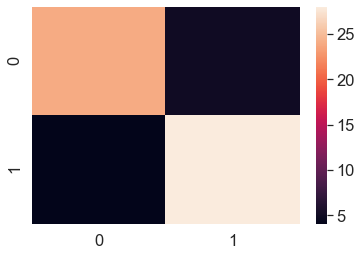

In [52]:
# Visualize using Seaborn heatmap
import seaborn as sb

sb.set(font_scale=1.5)

conf_matrix = confusion_matrix(Y_test, y_preds)

sb.heatmap(conf_matrix)

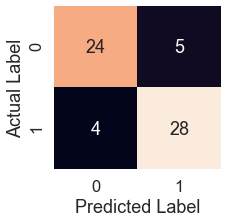

In [53]:
def plot_confusion_matrix(conf_matrix):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sb.heatmap(conf_matrix, annot=True, cbar=False)
    
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")

plot_confusion_matrix(conf_matrix)

### 4.5: Classification Report
- precision: accuracy on positives (# of true positives over total positives)
- recall: accuracy on negatives (# of true negatives over total negatives)
- F1: combined precision & recall
- support: # of samples for each case

In [54]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# 4(ii) Evaluate Model (Regression)
1. R^2 (Coefficient of Determination)
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

**R^2 (r-squared)** or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

**Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

**Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)


X = boston_housing.drop('target', axis=1)
Y = boston_housing['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train);

### 4.1: R^2 Coefficient (used by model.score)
- returns 0 if model always predicts mean
- returns 1 for perfect prediction (closer to 1 the better)
- proportion of the variance in the dependent variable that is predictable from the independent variable(s) 

In [56]:
model.score(X_test, Y_test)

0.873969014117403

### 4.2: Mean Absolute Error
- mean of absolute value of all errors (summed up)
- tells you how far off your model is on average

In [57]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(Y_test, y_preds)
mae

2.1226372549019623

In [58]:
df = pd.DataFrame(data={'actual values' : Y_test, 'predicted values' : y_preds, "errors" : y_preds - Y_test})
df

,actual values,predicted values,errors
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


### 4.3: Mean Squared Error
- mean of absolute value of all errors (summed up)
- amplifies larger errors and minimizes smaller errors

In [59]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(Y_test, y_preds)
mse

9.242328990196082

In [60]:
df = pd.DataFrame(data={'actual values' : Y_test, 'predicted values' : y_preds, "mean squared errors" : np.square(y_preds - Y_test)})
df

,actual values,predicted values,mean squared errors
173,23.6,23.002,0.357604
274,32.4,30.826,2.477476
491,13.6,16.734,9.821956
72,22.8,23.467,0.444889
452,16.1,16.853,0.567009
...,...,...,...
412,17.9,13.030,23.716900
436,9.6,12.490,8.352100
411,17.2,13.406,14.394436
86,22.5,20.219,5.202961


### 4.4: `Scoring` Parameters (for cross validation)
- allows us to highlight different types of scoring for cross validation

In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [62]:
# For Classification

In [63]:
np.random.seed(42)
cvs = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"Cross validated accuracy is: {np.mean(cvs) * 100:.2f}%")

Cross validated accuracy is: 82.48%


In [64]:
np.random.seed(42)
cvs = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"Cross validated precision is: {np.mean(cvs) * 100:.2f}%")

Cross validated precision is: 83.30%


In [65]:
np.random.seed(42)
cvs = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"Cross validated recall is: {np.mean(cvs) * 100:.2f}%")

Cross validated recall is: 85.45%


In [66]:
# For Regression

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = boston_housing.drop("target", axis=1)
y = boston_housing["target"]

regressor = RandomForestRegressor()

In [68]:
np.random.seed(42)
cvs = cross_val_score(regressor, X, y, cv=5, scoring="r2")
cvs
# we can see that model performs poorly for last 2 splits

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [69]:
np.random.seed(42)
cvs = cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_absolute_error")
cvs

array([-2.12870588, -2.58823762, -3.3420198 , -3.75555446, -3.34263366])

In [70]:
np.random.seed(42)
cvs = cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")
cvs

array([ -7.99104182, -12.88009356, -20.06894699, -45.70549288,
       -19.77049657])

### 4.5: Evaluation Metrics Using Scikit-Learn Functions (same types as above)

In [71]:
# Classification

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

In [73]:
# evaluate predictions made in y_preds
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%")
print(f"F1-Score (precision & recall): {f1_score(y_test, y_preds)*100:.2f}%")

Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1-Score (precision & recall): 86.15%


In [74]:
# Regression

In [75]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_housing.drop("target", axis=1)
y = boston_housing["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

y_preds = regressor.predict(X_test)

In [76]:
print(f"R2 Score: {r2_score(y_test, y_preds)*100:.2f}%")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_preds):.2f}")

R2 Score: 87.40%
Mean Absolute Error: 2.12
Mean Squared Error: 9.24


# 5. Improve Model

Data Perspective: Can we collect more of or improve our data?

Model Perspective: Can we choose better model?

Parameters:
- parameters: learned by the ML model (maximizing likelihood of events)
- hyperparameters: parameters we set for the model

In [135]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [136]:
# Hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1: Tuning Hyperparameters by Hand
- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`

In [150]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def eval_preds(y_true, y_preds):
    acc = accuracy_score(y_true, y_preds)
    prec = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy" : acc,
                  "precision" : prec,
                  "recall" : recall,
                  "f1" : f1}
    
    print(f"Accuracy: {acc*100:.2f}%")
    print(f"Precision: {prec*100:.2f}%")
    print(f"Recall: {recall*100:.2f}%")
    print(f"F1-Score (precision & recall): {f1*100:.2f}%")
    
    return metric_dict

In [151]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease_shuff = heart_disease.sample(frac=1)

X = heart_disease_shuff.drop("target", axis=1)
y = heart_disease_shuff["target"]

train_split_index = round(0.7 * len(heart_disease_shuff))
valid_split_index = round(train_split_index + (0.15 * len(heart_disease_shuff)))

X_train, y_train = X[:train_split_index], y[:train_split_index]
X_valid, y_valid = X[train_split_index : valid_split_index], y[train_split_index : valid_split_index]
X_test, y_test = X[valid_split_index:], y[valid_split_index:]

In [152]:
np.random.seed(42)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics = eval_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 84.00%
Recall: 84.00%
F1-Score (precision & recall): 84.00%


{'accuracy': 0.8222222222222222,
 'precision': 0.84,
 'recall': 0.84,
 'f1': 0.8399999999999999}

In [153]:
# Now create 2nd model with adjusted hyperparameters and compare

In [154]:
np.random.seed(42)

clf2 = RandomForestClassifier(n_estimators=1000)
clf2.fit(X_train, y_train)

y2_preds = clf2.predict(X_valid)

baseline_metrics2 = eval_preds(y_valid, y2_preds)
baseline_metrics2

Accuracy: 82.22%
Precision: 81.48%
Recall: 88.00%
F1-Score (precision & recall): 84.62%


{'accuracy': 0.8222222222222222,
 'precision': 0.8148148148148148,
 'recall': 0.88,
 'f1': 0.8461538461538461}

### 5.2: Tuning Hyperparameters With Randomized Search Cross Validation (RandomizedSearchCV)

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

grid = {"n_estimators" : [10, 100, 200, 500, 1000, 1200],
        "max_depth" : [None, 5, 10, 20, 30],
        "max_features" : ["auto", "sqrt"],
        "min_samples_split" : [2, 4, 6],
        "min_samples_leaf" : [1, 2, 4]}

X = heart_disease_shuff.drop("target", axis=1)
y = heart_disease_shuff["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# instantiate RandomizedSearchCV (takes 10 cross val tests using combinations of hyperparams in grid - 50 splits)
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10, 
                            cv=5, 
                            verbose=2)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   0.9s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   17.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [156]:
# params rs_clf will now use for predictions
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [157]:
rs_preds = rs_clf.predict(X_test)
rs_metrics = eval_preds(y_test, rs_preds)
rs_metrics

Accuracy: 81.97%
Precision: 77.42%
Recall: 85.71%
F1-Score (precision & recall): 81.36%


{'accuracy': 0.819672131147541,
 'precision': 0.7741935483870968,
 'recall': 0.8571428571428571,
 'f1': 0.8135593220338982}

### 5.3: Hyperparameter Tuning with Grid Search Cross Validation (GridSearchCV)
- exhaustive version of RandomizedSearchCV

In [158]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# Reduce number of possible combinations by reducing hyperparams
grid_2 = {"n_estimators" : [100, 200, 500],
        "max_depth" : [None],
        "max_features" : ["auto", "sqrt"],
        "min_samples_split" : [6],
        "min_samples_leaf" : [1, 2]}

X = heart_disease_shuff.drop("target", axis=1)
y = heart_disease_shuff["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

grid_clf = GridSearchCV(estimator=clf, 
                        param_grid=grid_2, 
                        cv=5, 
                        verbose=2)

grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   15.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [159]:
grid_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [160]:
grid_y_preds = grid_clf.predict(X_test)
grid_metrics = eval_preds(y_test, grid_y_preds)
grid_metrics

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1-Score (precision & recall): 77.97%


{'accuracy': 0.7868852459016393,
 'precision': 0.7419354838709677,
 'recall': 0.8214285714285714,
 'f1': 0.7796610169491526}

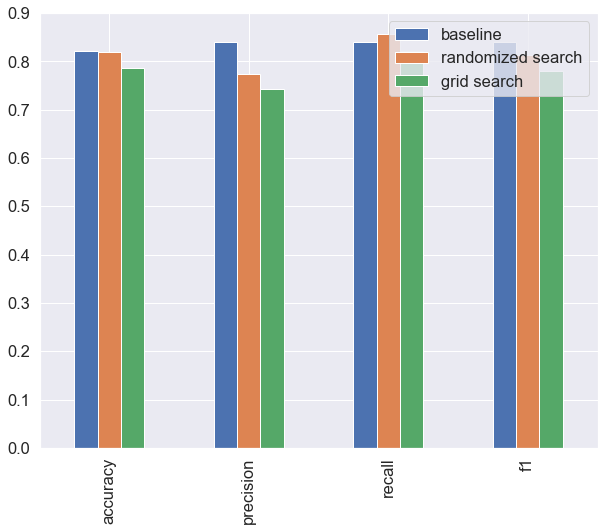

In [161]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                    "randomized search" : rs_metrics,
                    "grid search" : grid_metrics})

compare_metrics.plot.bar(figsize=(10,8))